### Deliverable 1: Preprocessing the Data for a Neural Network

In [6]:
pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
# Import our dependencies

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf



In [8]:
#  Import and read the charity_data.csv.
import pandas as pd 
# from google.colab import files
# application_df = files.upload()

# import io
# application_df = pd.read_csv(io.BytesIO(uploaded['charity_data.csv']))
# application_df = pd.read_csv['charity_data.csv']
application_df = pd.read_csv('charity_data.csv')
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1.0,0,N,5000.0,1.0
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1.0,1-9999,N,108590.0,1.0
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1.0,0,N,5000.0,0.0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1.0,10000-24999,N,6692.0,1.0
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1.0,100000-499999,N,142590.0,1.0


In [9]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(columns="EIN")
application_df = application_df.drop(columns="NAME")
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1.0,0,N,5000.0,1.0
1,T3,Independent,C2000,Preservation,Co-operative,1.0,1-9999,N,108590.0,1.0
2,T5,CompanySponsored,C3000,ProductDev,Association,1.0,0,N,5000.0,0.0
3,T3,CompanySponsored,C2000,Preservation,Trust,1.0,10000-24999,N,6692.0,1.0
4,T3,Independent,C1000,Heathcare,Trust,1.0,100000-499999,N,142590.0,1.0


In [10]:
# Determine the number of unique values in each column.
unique_val = application_df.nunique(axis=0)
unique_val
  
# print("No.of.unique values in each column :\unique_val",
#       unique_val)

APPLICATION_TYPE            15
AFFILIATION                  6
CLASSIFICATION              67
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   7352
IS_SUCCESSFUL                2
dtype: int64

In [11]:
# Look at APPLICATION_TYPE value counts for binning
# counting unique values

type_values = application_df['APPLICATION_TYPE'].value_counts()
type_values

T3     23955
T4      1221
T6      1075
T5       949
T19      885
T8       634
T7       627
T10      484
T9       138
T13       64
T12       20
T2        13
T14        3
T29        2
T25        2
Name: APPLICATION_TYPE, dtype: int64

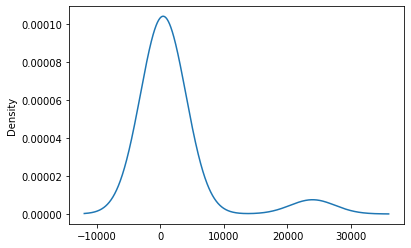

In [12]:
# Visualize the value counts of APPLICATION_TYPE
type_values.plot.density()

In [13]:
# Determine which values to replace if counts are less than ...?
replace_application = list(type_values[type_values < 500].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       23955
T4        1221
T6        1075
T5         949
T19        885
Other      726
T8         634
T7         627
Name: APPLICATION_TYPE, dtype: int64

In [14]:
# Look at CLASSIFICATION value counts for binning
classifiction_values = application_df['CLASSIFICATION'].value_counts()
classifiction_values.head(10)

C1000    15024
C2000     5242
C1200     4423
C2100     1827
C3000     1469
C7000      707
C1700      272
C4000      182
C5000      114
C1270      111
Name: CLASSIFICATION, dtype: int64

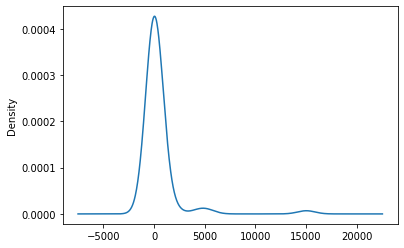

In [15]:
# Visualize the value counts of CLASSIFICATION
classifiction_values.plot.density()

In [16]:
# Determine which values to replace if counts are less than ..?
replace_class = list(classifiction_values[classifiction_values < 1000].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    15024
C2000     5242
C1200     4423
Other     2087
C2100     1827
C3000     1469
Name: CLASSIFICATION, dtype: int64

In [17]:
# Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()


In [18]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df.APPLICATION_TYPE.values.reshape(-1,1)))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(['APPLICATION_TYPE'])
encode_df.head()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,APPLICATION_TYPE_Other,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,APPLICATION_TYPE_nan
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
# Merge one-hot encoded features and drop the originals
# application_df.merge(encode_df,left_index=True,right_index=True).drop("APPLICATION_TYPE",1)
application_df = application_df.merge(encode_df,left_index=True, right_index=True)
application_df = application_df.drop(application_cat,1)
application_df.head()

<ipython-input-19-0131376f6634>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  application_df = application_df.drop(application_cat,1)


,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,APPLICATION_TYPE_nan
0,1.0,5000.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,108590.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,5000.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.0,6692.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,142590.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
# Split our preprocessed data into our features and target arrays

y = application_df["IS_SUCCESSFUL"].values
X = application_df.drop(["IS_SUCCESSFUL"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

<ipython-input-20-618a03837ba8>:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = application_df.drop(["IS_SUCCESSFUL"],1).values


In [21]:
y

array([ 1.,  1.,  0., ...,  1.,  1., nan])

In [22]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Deliverable 2: Compile, Train and Evaluate the Model

In [23]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.

number_input_features = len(X_train[0])

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=80, activation="relu", input_dim=number_input_features))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=30, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 80)                960       
                                                                 
 dense_1 (Dense)             (None, 30)                2430      
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 3,421
Trainable params: 3,421
Non-trainable params: 0
_________________________________________________________________


In [24]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [25]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=5)

Epoch 1/5
705/705 [==============================] - 2s 2ms/step - loss: nan - accuracy: 0.4675
Epoch 2/5
705/705 [==============================] - 2s 2ms/step - loss: nan - accuracy: 0.4591
Epoch 3/5
705/705 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.4591
Epoch 4/5
705/705 [==============================] - 3s 4ms/step - loss: nan - accuracy: 0.4591
Epoch 5/5
705/705 [==============================] - 3s 4ms/step - loss: nan - accuracy: 0.4591


In [26]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

235/235 - 1s - loss: nan - accuracy: 0.4526 - 990ms/epoch - 4ms/step
Loss: nan, Accuracy: 0.4525867700576782


In [27]:
# import h5py
# hdf5_path = "AlphabetSoupCharity.h5"

# Export our model to HDF5 file
# nn.save("AlphabetSoupCharity.h5")

# # Import the model to a new object
# nn_imported = tf.keras.models.load_model('AlphabetSoupCharity.h5')

import h5py
# nn.fit(....)
nn.save('AlphabetSoupCharity.h5')
